In [1]:
import nest_asyncio
nest_asyncio.apply()
import cmdstanpy as sp
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
plt.ioff()
from cycler import cycler
import matplotlib.patches as mpatches
import seaborn as sns
import arviz as az
import scipy.stats as stats
import ROOT as r
import time
import ctypes
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["mathtext.fontset"]="cm"
plt.rcParams['errorbar.capsize'] = 3
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=22
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle']=':'
plt.rcParams['grid.color']='black'
plt.rcParams['axes.prop_cycle'] = cycler(color=['black', 'red', 'blue', 'green'])

import arviz as az
import warnings
warnings.filterwarnings('ignore')
%jsroot on

Welcome to JupyROOT 6.26/00


In [2]:
diagnostics_df=pd.read_csv("./diagnostics.csv",index_col=0)
sigma_df=pd.read_csv('./sigma.csv',index_col=0)
diagnostics_df1=pd.read_csv("./diagnostics_1.csv",index_col=0)
sigma_df1=pd.read_csv('./sigma_1.csv',index_col=0)
sigma_df=sigma_df.join(sigma_df1)
diagnostics_df=diagnostics_df.join(diagnostics_df1)

FileNotFoundError: [Errno 2] No such file or directory: './sigma.csv'

In [ ]:
sigma_df

In [ ]:
plt.hist(np.abs(diagnostics_df.loc['mcse']/diagnostics_df.loc['sigma_median']),histtype='step',bins=20)
plt.xlabel('$\\frac{\Delta M(p(\Sigma|y))}{M(p(\Sigma|y)}$')
plt.grid(False)
plt.savefig('./plots/toyMC_mcse_hist.pdf',format='pdf',dpi=1000,bbox_inches='tight')
plt.show()

In [ ]:
pvals=diagnostics_df.loc[[f'pval{i:02d}' for i in range(12)]]
len(pvals.values.ravel())

In [ ]:
all_sigmas=[]
for i in range(len(sigma_df.columns)):
    all_sigmas.extend((np.array(sigma_df[f'toybin{i:04d}'].values)-0.3)/np.std(sigma_df[f'toybin{i:04d}'].values))


In [ ]:
h=r.TH1D("h","h",100,-5,5)
for i in range(len(all_sigmas)):
    h.Fill(all_sigmas[i])


In [ ]:
c=r.TCanvas("c","c")
c.Draw("")
c.SetBottomMargin(0.15)
h.Draw("")
h.GetXaxis().SetLabelFont(132)
h.GetYaxis().SetLabelFont(132)
h.GetYaxis().SetTitle("#font[132]{counts}")
h.GetXaxis().SetTitle("#font[132]{#frac{p(#Sigma|D_{#it{i}})-#Sigma_{true}}{std(p(#Sigma|D_{#it{i}}))}}")
h.SetTitle("")
h.GetYaxis().SetNdivisions(0)
h.GetYaxis().SetLabelSize(0)
r.gStyle.SetOptStat(0)
h.GetXaxis().SetTitleOffset(1.5)
f=r.TF1("f","gaus",-5,5)
h.Fit(f,"S")
t=r.TLatex()
t.SetTextAlign(22)
mu = f.GetParameter(1)
mu_err = f.GetParError(1)
sigma=f.GetParameter(2)
sigma_err=f.GetParError(2)
t.DrawLatex(0,5e3,f"#color[2]{{#font[132]{{#mu={mu:.4f}#pm{mu_err:.4f}, #sigma={sigma:.4f}#pm{sigma_err:.4f}}}}}")

In [ ]:
sigma_chi2_df=pd.read_csv('./sigma_chi2.csv',index_col=0).join(pd.read_csv('./sigma_chi2_1.csv',index_col=0))


In [ ]:
h1=r.TH1D("h1","h1",25,-5,5)
for i in range(len(sigma_chi2_df.columns)):
    h1.Fill((sigma_chi2_df[f'toybin{i:04d}']['sigma']-0.3)/sigma_chi2_df[f'toybin{i:04d}']['error'])

In [ ]:
c1=r.TCanvas("c1","c")
c1.Draw("")
c1.SetBottomMargin(0.15)
h1.Draw("")
h1.Fit("gaus","S")



In [ ]:
c.SaveAs("./plots/combined_post_add.pdf")
c.SaveAs("./plots/combined_post_add.root")

In [ ]:
plt.hist(diagnostics_df.loc[[f'pval{i:02d}' for i in range(12)]].values.ravel(),histtype='step',bins=20)
plt.xlabel(r'$T(A_{rep}>A)$')
plt.grid(False)
plt.savefig('./plots/toyMC_pval_hist.pdf',format='pdf',dpi=1000,bbox_inches='tight')
plt.show()

In [ ]:
h1.GetEntries()

In [ ]:
h.GetEntries()

In [11]:
x=np.linspace(-180,180,360)

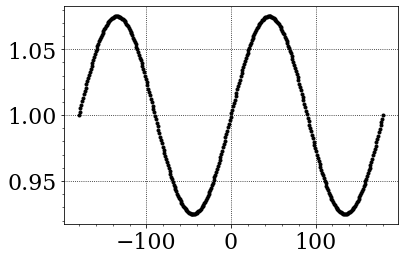

In [12]:
plt.plot(x,1-0.3*0.25*np.cos(2*(-45-x)*np.pi/180.),'.')
plt.show()

In [13]:
import random

In [59]:
x=np.linspace(-180,180,10000)
fx=1-0.5*0.25*np.cos(2*(-45-x)*np.pi/180.)

In [60]:
hx=random.choices(x,fx,k=10000)

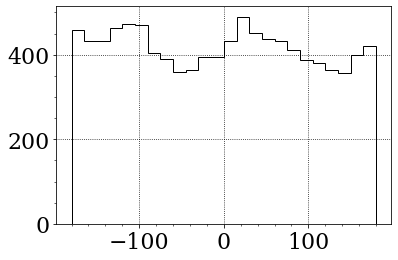

In [61]:
plt.hist(hx,histtype='step',bins=24)
plt.show()

In [62]:
h=r.TH1F("h",";#phi;",24,-180,180)
f=r.TF1("f","[0]*(1-0.25*[1]*cos(2*(-45-x)*TMath::Pi()/180.))")

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


In [63]:
for i in range(4000):
    h.Fill(hx[i])

In [64]:
c=r.TCanvas()
c.Draw()
h.Draw("ep")
h.Fit(f,"S")

 FCN=18.2191 FROM MIGRAD    STATUS=CONVERGED      96 CALLS          97 TOTAL
                     EDM=4.32414e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.65824e+02   2.62856e+00   5.62672e-03   1.03963e-06
   2  p1           5.07958e-01   8.87741e-02   1.90028e-04  -1.00130e-04
